In [50]:
import pandas as pd

data = pd.read_csv("data.csv")

data

Edibility Cap-shape Cap-surface Cap-color bruises? odor Gill-attachment  \
0            p         x           s         n        t    p               f   
1            e         x           s         y        t    a               f   
2            e         b           s         w        t    l               f   
3            p         x           y         w        t    p               f   
4            e         x           s         g        f    n               f   
...        ...       ...         ...       ...      ...  ...             ...   
8119         e         k           s         n        f    n               a   
8120         e         x           s         n        f    n               a   
8121         e         f           s         n        f    n               a   
8122         p         k           y         n        f    y               f   
8123         e         x           s         n        f    n               a   

     Gill-spacing Gill-size Gill-color  ... Stalk-surface-below-ring  \
0               c         n          k  ...                        s   
1               c         b          k  ...                        s   
2               c         b          n  ...                        s   
3               c         n          n  ...                        s   
4               w         b          k  ...                        s   
...           ...       ...        ...  ...                      ...   
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        k   
8123            c         b          y  ...                        s   

     Stalk-color-above-ring Stalk-color-below-ring Veil-type Veil-color  \
0                         w                      w         p          w   
1                         w                      w         p          w   
2                         w                      w         p          w   
3                         w                      w         p          w   
4                         w                      w         p          w   
...                     ...                    ...       ...        ...   
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     Ring-number Ring-type Spore-print-color Population Habitat  
0              o         p                 k          s       u  
1              o         p                 n          n       g  
2              o         p                 n          n       m  
3              o         p                 k          s       u  
4              o         e                 n          a       g  
...          ...       ...               ...        ...     ...  
8119           o         p                 b          c       l  
8120           o         p                 b          v       l  
8121           o         p                 b          c       l  
8122           o         e                 w          v       l  
8123           o         p                 o          c       l  

[8124 rows x 23 columns]

In [51]:
import numpy as np

features = np.array(data.drop(['Edibility'], axis = 1))
labels = np.array(data['Edibility'])

print(features.shape)
print(labels.shape)

(8124, 22)
(8124,)


In [52]:
from sklearn.decomposition import PCA

dummies = pd.get_dummies(data)
X = dummies.values
y = labels

print(X.shape)
print(y.shape)

pca = PCA(n_components = 2)
X_reduced = pca.fit(X).transform(X)
X_reduced = pd.DataFrame(data = X_reduced, columns = ['x', 'y'])
X_reduced.head()

(8124, 119)
(8124,)


x         y
0 -0.638268 -0.703743
1 -1.573287  0.027375
2 -1.670593 -0.198090
3 -0.744696 -0.410661
4 -1.029175 -0.955341

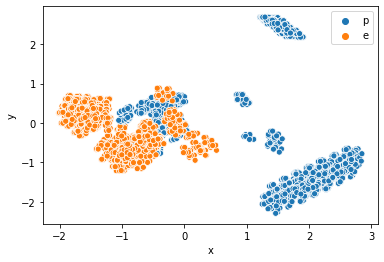

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'x', y = 'y', hue = y, data = X_reduced)

Metric:  0.777843860374724
K:  3


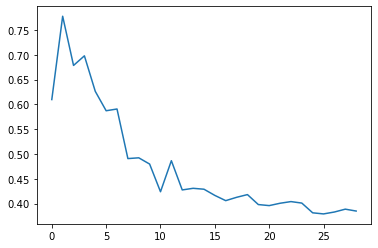

In [54]:
from sklearn import metrics

k = 2
metric = 0
new_k = 0
metric_array = np.zeros(29)
x_axis = np.zeros(29)
while k <= 30:
    kmeans = KMeans(n_clusters = k)
    model = kmeans.fit(X_reduced)
    new_metric = metrics.silhouette_score(X_reduced, model.labels_, metric = 'euclidean')
    if metric < new_metric:
        new_k = k
        metric = new_metric
    metric_array[k - 2] = new_metric
    x_axis[k - 2] = k - 2
    k = k + 1
    
plt.plot(x_axis, metric_array)
print("Metric: ", metric)
print("K: ", new_k)

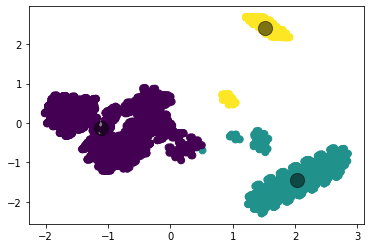

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters = new_k)
model = kmeans.fit(X_reduced)
y_kmeans = kmeans.predict(X_reduced)

plt.scatter(X_reduced.x, X_reduced.y, c = y_kmeans, s = 50, cmap = 'viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5)